### example telluric correction:

In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

(0.83, 1.08)

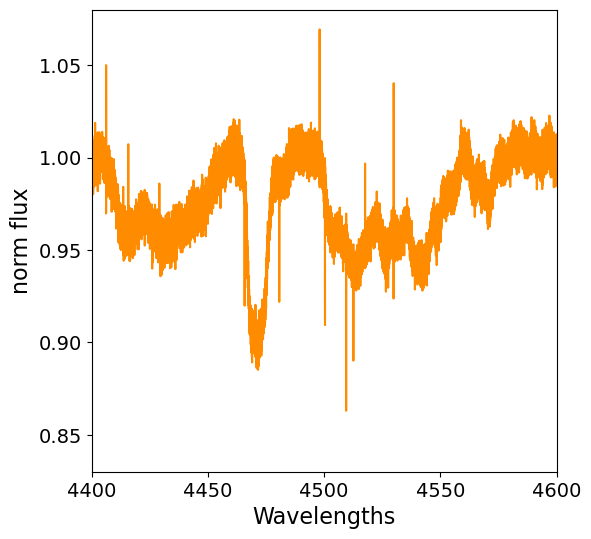

In [3]:
def read_spectrum(infile):
    data = fits.getdata(infile)
    wave = data[0]
    flux = data[1]
    return wave, flux

wave, flux = read_spectrum('/home/c4011027/PhD_stuff/ESO_proposals/manual_normalization/norm/ADP.2024-07-05T12:10:57.794_norm.fits')
plt.figure(figsize =[6,6])
plt.plot(wave, flux, color = 'darkorange')
plt.xlabel('Wavelengths', fontsize=16)
plt.ylabel('norm flux', fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.xlim(4400, 4600)
plt.ylim(0.83, 1.08)

In [4]:
mask = np.where((wave>4400) & (wave<4600))
wv, flx = wave[mask], flux[mask]
smooth_flx = gaussian_filter1d(flx, sigma=10)  # Adjust sigma as needed
telluric_mask = (flx < (smooth_flx*0.97)) | (flx > (smooth_flx*1.03))  # Areas where flux drops below 90% of smoothed flux
cleaned_flx = np.where(telluric_mask, np.interp(wv, wv[~telluric_mask], flx[~telluric_mask]), flx)

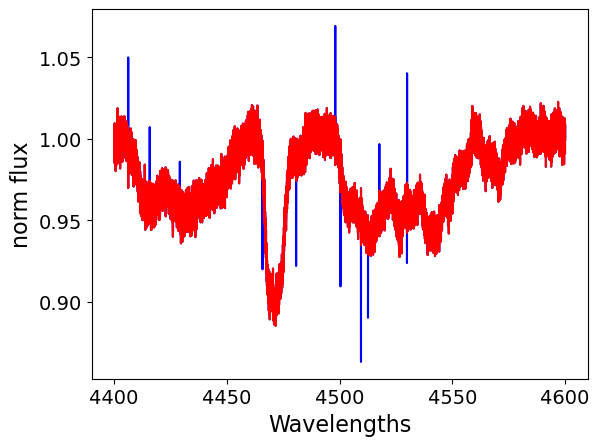

In [6]:
plt.plot(wv, flx, color = 'blue')
plt.plot(wv, smooth_flx, color = 'orange')
plt.plot(wv, cleaned_flx, color = 'r')
plt.xlabel('Wavelengths', fontsize=16)
plt.ylabel('norm flux', fontsize=16)
plt.tick_params(axis='both', labelsize=14)